#Boosting Techniques

1. What is Boosting in Machine Learning? Explain how it improves weak
learners.
   -  Boosting is an ensemble technique in machine learning that combines multiple weak learners (typically decision trees) to form a strong learner. A weak learner is a model that performs only slightly better than random guessing. Boosting works sequentially, where each new model focuses on correcting the errors of the previous models.

   - How it improves weak learners:

        Assigns weights to training samples. Initially, all samples are equally weighted.

        After training each weak learner, misclassified samples get higher weights.

        The next learner focuses more on these difficult samples.

        Final prediction is made by weighted majority voting (classification) or weighted sum (regression).

     This sequential learning reduces bias and variance, improving prediction accuracy.

2. : What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?
  - AdaBoost:

        - Weight-based approach: Adjusts sample weights after each iteration
        -   Focus mechanism: Increases weights of misclassified samples, decreases weights of correctly classified samples
        -   Model training: Each new model is trained on the reweighted dataset
        -   Error calculation: Uses weighted error rate to determine model importance
        -   Combination: Final prediction is a weighted vote of all models
        -   Simplicity: Generally uses simple base learners like decision stumps
        -   Speed: Faster training due to simpler weight adjustment mechanism

 - Gradient Boosting:
       - Residual-based approach: Fits new models to the residual errors of previous models
       -  Gradient descent: Uses gradient descent optimization to minimize loss function
       -  Model training: Each new model predicts the residuals (errors) of the ensemble so far
       - Flexibility: Can optimize any differentiable loss function
       - Combination: Final prediction is the sum of all model predictions
       - Complexity: Can use more complex base learners and various loss functions
       - Precision: More precise optimization through gradient-based learning


3. How does regularization help in XGBoost?
   - XGBoost uses regularization (L1 and L2 penalties) to avoid overfitting:

      -  L1 regularization (Lasso): Encourages sparsity in leaf weights (some weights = 0).

      -  L2 regularization (Ridge): Shrinks large weights to prevent over-complexity.

      -  Learning rate (η): Shrinks contribution of each tree to stabilize learning.

      -  Column & row sampling: Works like dropout to prevent overfitting.

      -  This makes XGBoost more robust compared to standard Gradient Boosting.


4.  Why is CatBoost considered efficient for handling categorical data?
   - CatBoost is designed for categorical features:

       -  Uses ordered target encoding (instead of one-hot encoding), reducing dimensionality and avoiding overfitting.

       -  Handles high-cardinality categorical features efficiently.

       -  Automatically detects categorical columns, so minimal preprocessing is required.

      -   Reduces bias from "target leakage" using permutation-based encoding.

        Thus, CatBoost is more efficient and accurate when datasets have many categorical variables.

5. What are some real-world applications where boosting techniques are
preferred over bagging methods?
   - Fraud Detection → Boosting handles imbalanced data better than bagging.

   -  Credit Scoring & Loan Default Prediction → Boosting captures complex relationships.

   -  Healthcare Diagnostics (Cancer Detection) → Boosting gives higher accuracy.

   -   Search Ranking (used by Google, Yandex).

   -  Customer Churn Prediction → Boosting handles categorical + numeric features well.


   





6. : Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize AdaBoost classifier
model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("AdaBoost Classifier Accuracy:", accuracy)


AdaBoost Classifier Accuracy: 0.9736842105263158


7. Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate with R² score
r2 = r2_score(y_test, y_pred)

print("Gradient Boosting Regressor R² Score:", r2)


Gradient Boosting Regressor R² Score: 0.8004451261281281


8. Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize XGBoost classifier (no need for use_label_encoder)
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Parameter grid for learning_rate tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("XGBoost Classifier Accuracy:", accuracy)


Best Parameters: {'learning_rate': 0.2}
XGBoost Classifier Accuracy: 0.956140350877193


9.  Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn

In [6]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00


CatBoost Classifier Accuracy: 0.9649122807017544


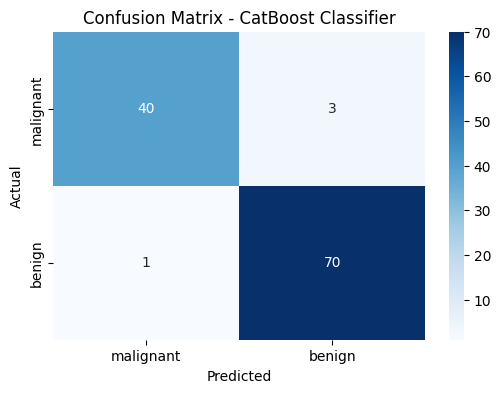

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from catboost import CatBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize CatBoost classifier
model = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, verbose=0, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("CatBoost Classifier Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()


10. You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model

ANSWER:-

   - 1. Data Preprocessing & Handling Missing/Categorical Values

     - Missing values

        Numeric features: impute using median (robust to outliers) or KNN imputer.

        Categorical features: impute using mode or create a new category "Missing".

        If % of missing is very high → consider dropping the feature.

    - Categorical encoding

        For tree-based boosting methods (XGBoost, CatBoost):

        XGBoost: needs one-hot encoding or target encoding for high-cardinality categories.

        CatBoost: natively handles categorical features → no manual encoding required.

    - Feature scaling

        Boosting algorithms don’t require strict normalization, but scaling may help with convergence for some variants.

    - Imbalance handling

        Use techniques like:

        scale_pos_weight parameter in XGBoost.

        Class weights in AdaBoost / CatBoost.

        Oversampling (SMOTE) or undersampling.

-  2. Choice between AdaBoost, XGBoost, or CatBoost

    - AdaBoost: Simple, works well on clean, balanced datasets → not ideal here because data is imbalanced & mixed type.

    -  XGBoost: Powerful, great for structured/tabular data, but requires manual categorical handling.

    -  CatBoost: Best choice here because:

        -  Handles categorical features natively.

        - Robust to missing values.

        - Handles class imbalance with class_weights.

     -  I’d start with CatBoost and compare performance against XGBoost as a benchmark.


  - 3. Hyperparameter Tuning Strategy

     - Use GridSearchCV / RandomizedSearchCV or better: Bayesian optimization (Optuna/Hyperopt) for efficiency.

     - Key hyperparameters:

        -  learning_rate (lower → better generalization, but slower training)

        -  depth (controls model complexity)

        -  n_estimators (number of boosting rounds)

        -  l2_leaf_reg (regularization to avoid overfitting)

        -  class_weights (to handle imbalance)

     - Strategy:

         -   Start with coarse random search to find a promising region.

         -    Fine-tune using grid search around that region.   



 -  4. Evaluation Metrics

    Since dataset is imbalanced, accuracy is misleading. Better metrics:

       -  AUC-ROC → measures ranking ability of positive vs negative classes.

       -  Precision, Recall, F1-score → especially recall (catching defaulters is critical).

       -  PR-AUC (Precision-Recall AUC) → more informative for imbalanced datasets.

       -  Confusion Matrix → to analyze false negatives (missed defaulters).

   -  For business: I’d emphasize Recall & Precision, depending on risk appetite.  


 -  5. Business Benefits

       -  Lower default rates: Model helps identify risky customers before granting loans.

       -  Better risk-based pricing: High-risk customers get stricter terms (higher interest, collateral requirement).

       -  Improved profitability: Reducing defaults increases net returns.

       -  Customer trust: Safer lending improves company’s reputation and long-term sustainability.

       -  Regulatory compliance: Transparent, explainable boosting models (especially CatBoost with feature importance & SHAP values) help satisfy regulators      



Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters: {'learning_rate': 0.01, 'l2_leaf_reg': 9, 'iterations': 200, 'depth': 6}

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.85       172
           1       0.22      0.29      0.25        28

    accuracy                           0.76       200
   macro avg       0.55      0.56      0.55       200
weighted avg       0.78      0.76      0.77       200

ROC-AUC Score: 0.6135797342192691


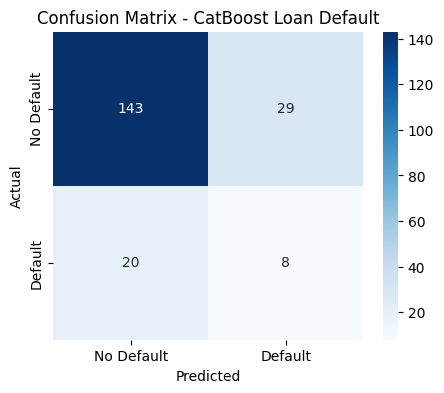

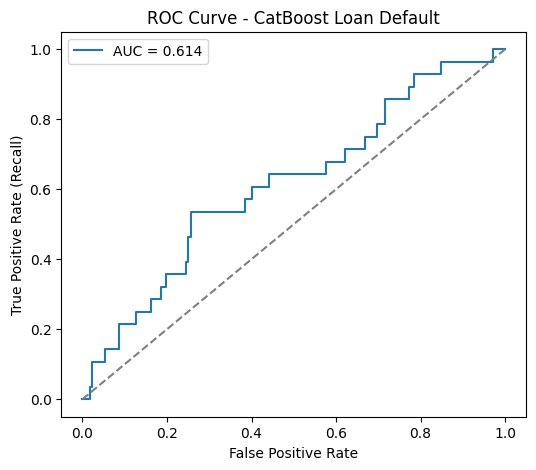

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from catboost import CatBoostClassifier, Pool
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------
# 1. Load Dataset
# -------------------------
# Replace with your dataset
# df = pd.read_csv("loan_data.csv")

# Example placeholder (simulate structure)
np.random.seed(42)
df = pd.DataFrame({
    "age": np.random.randint(18, 70, 1000),
    "income": np.random.randint(20000, 100000, 1000),
    "gender": np.random.choice(["Male", "Female"], 1000),
    "transaction_count": np.random.randint(0, 500, 1000),
    "loan_default": np.random.choice([0, 1], 1000, p=[0.85, 0.15])  # imbalanced
})

# -------------------------
# 2. Handle Missing Values
# -------------------------
# Example: Fill numeric missing with median, categorical with "Missing"
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna("Missing")
    else:
        df[col] = df[col].fillna(df[col].median())

# -------------------------
# 3. Split Data
# -------------------------
X = df.drop("loan_default", axis=1)
y = df["loan_default"]

# Identify categorical features
cat_features = [col for col in X.columns if X[col].dtype == "object"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------
# 4. Initialize CatBoost
# -------------------------
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    class_weights=[1, 5],  # higher weight to minority class (defaulters)
    eval_metric="AUC",
    random_seed=42,
    verbose=0
)

# -------------------------
# 5. Hyperparameter Tuning (RandomizedSearchCV)
# -------------------------
param_grid = {
    "depth": [4, 6, 8, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "l2_leaf_reg": [1, 3, 5, 7, 9],
    "iterations": [200, 500, 800]
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=5,  # increase for real tuning
    scoring="roc_auc",
    cv=3,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train, y_train, cat_features=cat_features)

best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# -------------------------
# 6. Evaluation
# -------------------------
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Default", "Default"],
            yticklabels=["No Default", "Default"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Loan Default")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.3f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - CatBoost Loan Default")
plt.legend()
plt.show()
